# S6
This is a iPython Notebook document, associated to the S6 figure in the Support Information of the manuscript:
# PALMA, an improved algorithm for the DOSY signal processing
Afef cherni, Émilie chouzenoux, Marc-André Delsuc 

# Signal C2

PDI of x2 = 1.31678084801


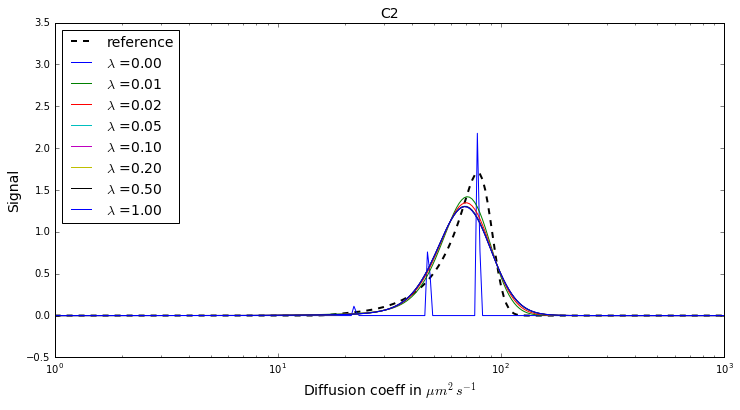

,$\lambda$,Quality reconstruction in $dB$ of Xu2,PDI of Xu2
0,0.00,-9.656869,1.267061
1,0.01,12.728091,1.365333
2,0.02,11.613924,1.402117
3,0.05,10.972543,1.435175
4,0.10,10.890013,1.441369
5,0.20,10.860874,1.442497
6,0.50,10.814573,1.441072
7,1.00,10.760207,1.414606


In [2]:
import numpy as np
import scipy.stats
import scipy
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
%matplotlib inline
import commun.scene as scene
import commun.PALMA as PALMA
import pandas as pd
##############################
#Measurement parameter
##############################
N = 256
M = 64
delta = 2E-3
Delta = 50E-3
Dmin = 1.0
Dmax = 1000.0
D = 16
noise = 0.001 #noise = 0.1%
##############################
#Algorithm parameter
##############################
nbiter = 200000
prec = 1E-14
full_output = False
##############################
# Measurement of signal C1 
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_linear(D, Delta, M)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
np.random.seed(1234)
# C2
x2 = scene.scene_Xu_ass(N, Dmin, Dmax, width=4)
x2 = x2.reshape((N,1))
z2 = np.dot(K,x2) 
sigma2 = noise*z2[0]
y2 = z2 + sigma2*np.random.randn(M,1)
eta2 = 1.01*np.sqrt(M)*sigma2
##############################
#PDI coefficient of signal C2
##############################
pdi_2 = scene.PDI(x2, N, Dmin , Dmax)
print 'PDI of x2 =', pdi_2
##############################
#Signal reconstruction
##############################
LamdaList = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
Qlt_2 = []
PDI_2 = []
coeff = 8
plt.figure(figsize=(12,6))
plt.semilogx(Lap_axis, x2, 'k--', linewidth = 2,  label = "reference")
for lamda in LamdaList:
    #Reconstruction of the signal C2
    x2_n, criters = PALMA.PPXAplus(K, Binv, y2, eta2, nbiter, lamda, prec, full_output)
    #Plot of recovered signal C2
    plt.semilogx(Lap_axis,x2_n/coeff, linewidth = 1, label = r"$\lambda$ =%.2f" % lamda)
    plt.legend(loc=2, fontsize=14)
    plt.title("C2", fontsize=14)
    plt.ylabel("Signal", size=14)
    plt.xlabel("Diffusion coeff in $\mu m^2 \, s^{-1}$", size=14)
    plt.ylim(ymin=-0.5, ymax=3.5)
    error2 =  np.linalg.norm(x2_n-x2,2) / np.linalg.norm(x2)   
    quality2 = -20*np.log10(error2) 
    Qlt_2.append(quality2)
    #PDI coeff
    pdi2 = scene.PDI(x2_n, N, Dmin, Dmax)
    PDI_2.append(pdi2)
    coeff = 1
#plt.savefig('SC2.eps', format='eps', dpi=1000)
plt.show()
tab = pd.DataFrame()
tab["$\lambda$"]= list(LamdaList)
tab["Quality reconstruction in $dB$ of Xu2"] = list(Qlt_2)
tab["PDI of Xu2"]= list(PDI_2)
tab